<a href="https://colab.research.google.com/github/Kate5-7-2021/INFO-5502-SU2021/blob/main/INFO_5502_Assign5_Murder_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Murder Rates**

Murder rates are calculated as follows:

murder rate for state X in year Y = 100000 * (number of murders in state X in year Y / population in state X in year Y)

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)


In [157]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

#from client.api.assignment import load_assignment
#tests = load_assignment('project2.ok')
import pandas as pd


In [158]:
df = pd.read_csv (r'/content/crime_rates.csv')
#df.to_csv (r'/content/crime_rates.csv', index=None)
df

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.300003,10.2,20.799999,28.299999,45.099998,1544.900024,332.100006,970.500000,242.300003
1,Alaska,1961,234000,88.900002,11.5,13.200000,12.400000,51.700001,1540.599976,380.799988,950.000000,209.800003
2,Alaska,1962,246000,91.500000,4.5,18.700001,13.800000,54.500000,1564.599976,351.600006,985.400024,227.600006
3,Alaska,1963,248000,109.699997,6.5,14.900000,22.200001,66.099998,1952.800049,381.500000,1213.699951,357.700012
4,Alaska,1964,250000,150.000000,10.4,22.400000,21.200001,96.000000,2016.000000,443.600006,1218.400024,354.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,Wyoming,1999,480000,232.500000,2.3,28.600000,15.400000,186.199997,3225.199951,489.799988,2611.100098,124.300003
2196,Wyoming,2000,493782,266.500000,2.4,32.400002,14.200000,217.500000,3031.500000,420.799988,2494.600098,116.000000
2197,Wyoming,2001,494423,257.299988,1.8,30.900000,17.000000,207.500000,3260.399902,501.799988,2617.800049,140.800003
2198,Wyoming,2002,498830,273.399994,3.0,29.700001,18.600000,222.100006,3306.500000,490.700012,2666.800049,148.899994


In [160]:
state_abb = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

df['state_abbrev']=df['State'].map(state_abb)
df

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate,state_abbrev
0,Alaska,1960,226167,104.300003,10.2,20.799999,28.299999,45.099998,1544.900024,332.100006,970.500000,242.300003,AK
1,Alaska,1961,234000,88.900002,11.5,13.200000,12.400000,51.700001,1540.599976,380.799988,950.000000,209.800003,AK
2,Alaska,1962,246000,91.500000,4.5,18.700001,13.800000,54.500000,1564.599976,351.600006,985.400024,227.600006,AK
3,Alaska,1963,248000,109.699997,6.5,14.900000,22.200001,66.099998,1952.800049,381.500000,1213.699951,357.700012,AK
4,Alaska,1964,250000,150.000000,10.4,22.400000,21.200001,96.000000,2016.000000,443.600006,1218.400024,354.000000,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,Wyoming,1999,480000,232.500000,2.3,28.600000,15.400000,186.199997,3225.199951,489.799988,2611.100098,124.300003,WY
2196,Wyoming,2000,493782,266.500000,2.4,32.400002,14.200000,217.500000,3031.500000,420.799988,2494.600098,116.000000,WY
2197,Wyoming,2001,494423,257.299988,1.8,30.900000,17.000000,207.500000,3260.399902,501.799988,2617.800049,140.800003,WY
2198,Wyoming,2002,498830,273.399994,3.0,29.700001,18.600000,222.100006,3306.500000,490.700012,2666.800049,148.899994,WY


In [161]:
state_list_in=df['state_abbrev'].to_list()
state_list=set(state_list_in)
state_list

{'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 nan}

Question 1.1. What additional information will we need before we can check for that association?
Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let’s plot a couple, just to see the variety.


In [162]:
import seaborn as sns

mur_rate= df.pivot("Year", "State", "Murder Rate")
mur_rate.head()


#sns.lmplot(x='Year', y='Murder Rate', hue='State', 
           #data=df.loc[df['State'].isin([state_list])], 
           #fit_reg=False)

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachuse,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Isla,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,12.4,10.2,6.0,8.5,3.9,4.2,1.6,7.4,10.6,11.9,2.4,2.4,4.9,4.4,0.6,2.9,6.7,8.3,1.7,5.4,1.4,4.5,1.2,10.0,4.4,3.9,2.3,8.8,1.3,2.7,7.4,2.9,10.6,0.5,3.2,7.5,2.4,2.6,1.0,13.2,2.1,8.5,8.6,1.0,0.3,12.3,2.1,4.4,1.3,4.8
1961,12.9,11.5,6.0,9.1,3.7,4.7,1.0,4.4,9.1,10.0,2.3,2.0,4.8,4.1,1.3,1.9,6.5,6.4,1.6,4.5,1.5,4.1,1.0,10.3,5.1,2.5,2.4,7.0,0.6,2.5,6.8,3.5,9.2,0.9,3.1,5.0,2.7,2.6,1.0,11.6,1.7,8.0,8.1,1.7,1.5,8.6,2.2,4.4,1.6,3.3
1962,9.4,4.5,5.7,7.9,3.9,5.0,1.3,4.3,7.7,10.3,2.9,3.0,5.3,3.5,1.1,2.8,6.5,6.8,1.4,5.7,1.8,3.4,0.9,7.3,5.5,2.1,1.5,8.1,2.4,3.0,6.3,3.6,7.9,1.2,3.2,5.1,2.9,2.7,0.8,10.1,3.3,6.1,7.2,2.3,0.3,8.7,2.5,3.7,0.9,3.3
1963,10.2,6.5,6.0,7.4,3.8,4.8,1.8,5.0,8.2,9.4,1.7,2.5,5.1,2.8,1.3,2.6,5.6,6.9,1.9,6.3,1.9,3.5,1.2,7.2,5.2,2.0,2.0,7.9,3.2,2.8,5.6,3.8,8.2,2.1,3.0,5.2,3.0,2.3,1.4,10.0,1.2,6.5,7.4,2.4,0.5,7.1,2.5,5.3,1.7,3.6
1964,9.3,10.4,5.2,7.6,4.1,4.2,1.8,4.7,8.6,11.7,2.1,4.0,5.5,3.0,1.3,3.4,5.2,8.3,1.5,6.7,2.0,3.5,1.4,10.1,5.4,2.7,2.3,7.8,0.9,3.1,5.6,4.6,8.0,0.9,3.5,4.5,1.8,3.4,1.2,8.1,1.3,5.9,7.6,1.5,0.5,8.4,2.4,3.7,1.5,5.5


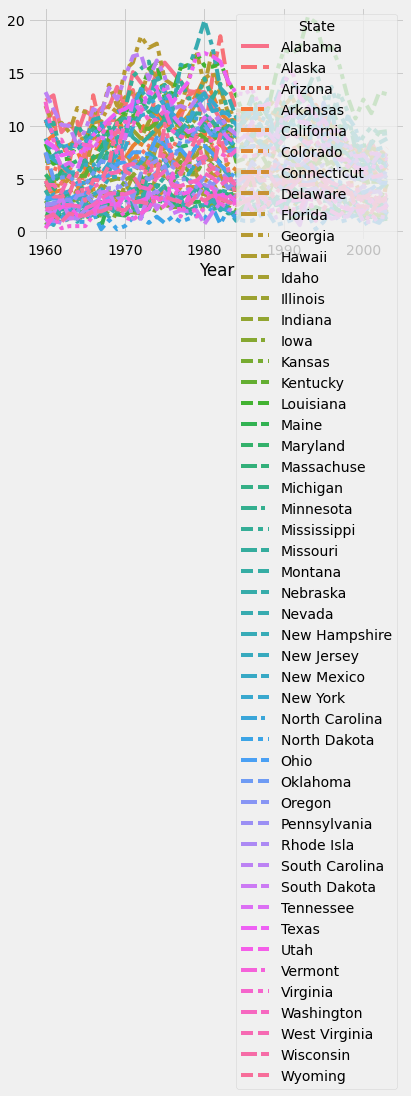

In [163]:
sns.lineplot(data=mur_rate)

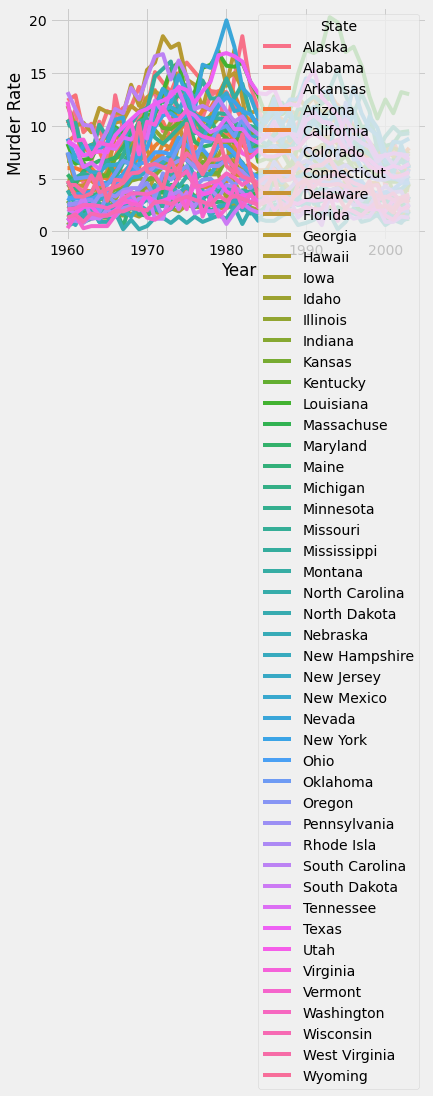

In [164]:
sns.lineplot(data=df, x="Year", y="Murder Rate", hue="State")

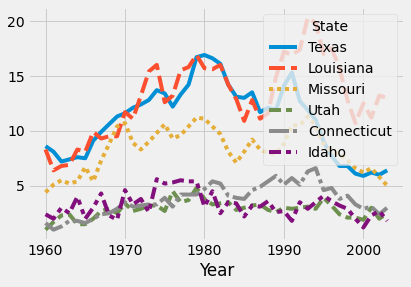

In [165]:
sns.lineplot(data=mur_rate[['Texas', 'Louisiana', 'Missouri','Utah','Connecticut', 'Idaho']])


Question 1.2. Draw a line plot with years on the horizontal axis and murder rates on the vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call: ak mn.plot(’Year’).

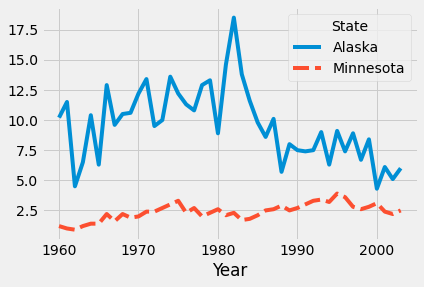

In [166]:
sns.lineplot(data=mur_rate[['Alaska', 'Minnesota']])

In [167]:
mur_rate_table=Table().with_columns(
    'State',df['State'].to_numpy(),
    'state_abbrev',df['state_abbrev'].to_numpy(),
    'Year',df['Year'].to_numpy(),
    'Population',df['Population'].to_numpy(),
    'Murder Rate',df['Murder Rate'].to_numpy()
)
mur_rate_table.set_format("Population", NumberFormatter)

State,state_abbrev,Year,Population,Murder Rate
Alaska,AK,1960,"226,167",10.2
Alaska,AK,1961,"234,000",11.5
Alaska,AK,1962,"246,000",4.5
Alaska,AK,1963,"248,000",6.5
Alaska,AK,1964,"250,000",10.4
Alaska,AK,1965,"253,000",6.3
Alaska,AK,1966,"272,000",12.9
Alaska,AK,1967,"272,000",9.6
Alaska,AK,1968,"277,000",10.5
Alaska,AK,1969,"282,000",10.6


In [168]:
mur_table=mur_rate_table.where('state_abbrev','AK')
mur_table

State,state_abbrev,Year,Population,Murder Rate
Alaska,AK,1960,"226,167",10.2
Alaska,AK,1961,"234,000",11.5
Alaska,AK,1962,"246,000",4.5
Alaska,AK,1963,"248,000",6.5
Alaska,AK,1964,"250,000",10.4
Alaska,AK,1965,"253,000",6.3
Alaska,AK,1966,"272,000",12.9
Alaska,AK,1967,"272,000",9.6
Alaska,AK,1968,"277,000",10.5
Alaska,AK,1969,"282,000",10.6


In [169]:
ak = mur_rate_table.where('state_abbrev', 'AK').drop('State','state_abbrev', 'Population').relabeled(1, 'Murder rate in Alaska')
mn = mur_rate_table.where('state_abbrev', 'MN').drop('State','state_abbrev', 'Population').relabeled(1, 'Murder rate in Minnesota')
ak

Year,Murder rate in Alaska
1960,10.2
1961,11.5
1962,4.5
1963,6.5
1964,10.4
1965,6.3
1966,12.9
1967,9.6
1968,10.5
1969,10.6


In [170]:
mn

Year,Murder rate in Minnesota
1960,1.2
1961,1
1962,0.9
1963,1.2
1964,1.4
1965,1.4
1966,2.2
1967,1.6
1968,2.2
1969,1.9


In [171]:
ak_mn =Table().with_columns(
    'Year',ak['Year'],
    'Murder rate in Alaska',ak['Murder rate in Alaska'],
    'Murder rate in Minnesota',mn['Murder rate in Minnesota']
)
ak_mn

Year,Murder rate in Alaska,Murder rate in Minnesota
1960,10.2,1.2
1961,11.5,1
1962,4.5,0.9
1963,6.5,1.2
1964,10.4,1.4
1965,6.3,1.4
1966,12.9,2.2
1967,9.6,1.6
1968,10.5,2.2
1969,10.6,1.9


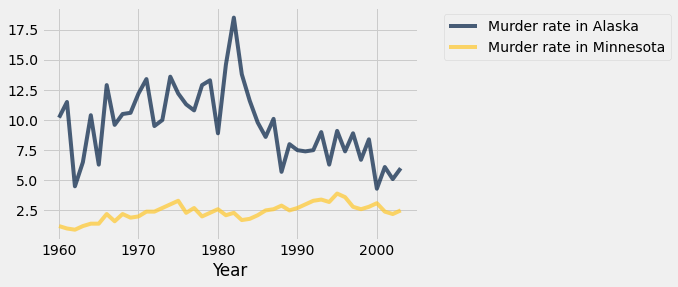

In [172]:
ak_mn.plot('Year')

Question 1.3. Implement the function most murderous, which takes a year (an integer) as its argument. It does two things:
1.	It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.
2.	It returns an array of the names of these states in order of increasing murder rate.


array(['Louisiana', 'New York', 'Texas', 'Mississippi', 'California'],
      dtype=object)

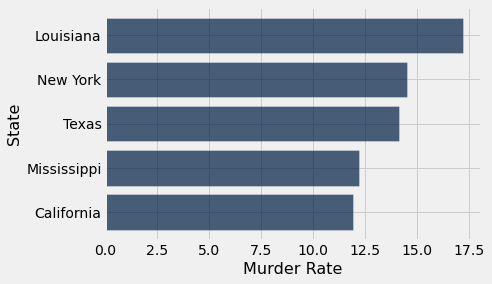

In [173]:
def most_murderous(year):
    # Fill in this line so that the next 2 lines do what the function
    # is supposed to do most should be a table.
    most =mur_rate_table.where('Year', are.equal_to(year)).sort('Murder Rate',descending=True).take(np.arange(5))
    most.barh('State', 'Murder Rate')
    return most.column('State')

most_murderous(1990)

Question 1.4.  How many more people were murdered in California in 1988 than in 1975?  Assign
ca change to the answer.


In [174]:
#there is no difference between murder rate in both years
#however, the population in these two years are different, so number of the people would be different
ca = mur_rate_table.where('State', are.equal_to('California'))
ca_change = ca.where('Year', are.equal_to(1988)).column('Murder Rate') - ca.where('Year', are.equal_to(1975)).column('Murder Rate')
ca_change
np.round(ca_change)    

array([0.])

In [175]:
ca = mur_rate_table.where('State', are.equal_to('California'))
num_people_1988=(ca.where('Year',are.equal_to(1988)).column('Murder Rate') * ca.where('Year', 1988).column('Population'))/100000
num_people_1975=(ca.where('Year', 1975).column('Murder Rate') * ca.where('Year', 1975).column('Population'))/100000
ca_change = num_people_1988 - num_people_1975
np.round(ca_change)

array([726.])


#**2. Changes in Murder Rates**


In [176]:
def diff_n(values, n):            #example of what we expected
    return np.array(values)[n:] - np.array(values)[:-n]

diff_n(make_array(1, 10, 100, 1000, 10000), 2)

array([  99,  990, 9900])

Question 2.1. Implement the function two year changes that takes an array of murder rates for a state, ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns the number of increases minus the number of decreases.

In [177]:
"Return the number of increases minus the number of decreases after two years."
def two_year_changes(rates):
    return np.count_nonzero((diff_n(rates,2))>0) - np.count_nonzero((diff_n(rates,2))<0)
print('Alaska:',    two_year_changes(ak.column('Murder rate in Alaska')))
print('Minnesota:', two_year_changes(mn.column('Murder rate in Minnesota')))

Alaska: -5
Minnesota: 6


Question 2.2. Assign changes by state to a table with one row per state that has two columns: the State name and the Murder Rate two year changes statistic computed across all years in our data set for that state.

In [178]:
changes_by_state = mur_rate_table.drop('state_abbrev','Population','Year').group('State', two_year_changes)
changes_by_state 

State,Murder Rate two_year_changes
Alabama,-6
Alaska,-5
Arizona,1
Arkansas,-1
California,17
Colorado,-4
Connecticut,4
Delaware,-3
Florida,-6
Georgia,-3


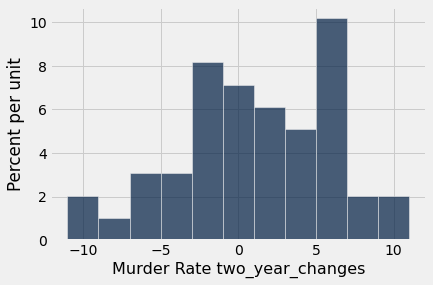

In [179]:
changes_by_state.hist("Murder Rate two_year_changes", bins=np.arange(-11, 12, 2))

Question 2.3. Assign total changes to the total increases minus the total decreases for all two-year periods and all states in our data set.

In [180]:

#total_changes = sum(changes_by_state.column('Murder Rate two_year_changes'))  #Also can make it short
total_changes = sum((mur_rate_table.drop('state_abbrev','Population','Year').group('State', two_year_changes)).column('Murder Rate two_year_changes'))
print('Total increases minus total decreases, across all states and years:', total_changes)

Total increases minus total decreases, across all states and years: 45


Question 2.4. Set num changes to the number of different two-year periods in the entire data set that could result in a change of a state’s murder rate. Include both those periods where a change occurred and the periods where a state’s rate happened to stay the same.
We now have enough information to perform a hypothesis test.


In [181]:
all_states=mur_rate_table.column('State')
change_mur_rate=make_array()
for i in np.arange(50):
  mur_rates=mur_rate_table.where('State',all_states.item(i)).column('Murder Rate')
  mur_occurance=len(diff_n(mur_rates,2))
  change_mur_rate=np.append(change_mur_rate, mur_occurance)
num_changes = sum(change_mur_rate)
num_changes

2100.0

Question 2.5. Given these null and alternative hypotheses, define a good test statistic.
Important requirements for your test statistic: Choose a test statistic for which large positive values are evidence in favor of the alternative hypothesis, and other values are evidence in favor of the null hypothesis. Your test statistic should depend only on whether murder rates increased or decreased, not on the size of any change.


In [185]:
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,0.5))
uniform.sample_from_distribution('Chance', 100)

Change,Chance,Chance sample
Increase,0.5,42
Decrease,0.5,58


Question 2.6. Complete the simulation below, which samples num changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis. Your job is to

•	fill in the function simulate under null, which simulates a single sample under the null hypothesis, and

•	fill in its argument when it’s called below


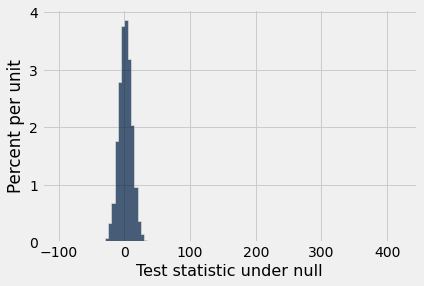

In [186]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of your
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    inc_occurance=uniform.sample_from_distribution('Chance', 200).column('Chance sample').item(0)
    dec_occurance=uniform.sample_from_distribution('Chance', 200).column('Chance sample').item(1)
    return inc_occurance - dec_occurance

uniform_samples = make_array()
for i in np.arange(5000):
    uniform_samples = np.append(uniform_samples, simulate_under_null(num_changes))

# Feel free to change the bins if they don't make sense for your test statistic.    
Table().with_column('Test statistic under null', uniform_samples).hist(0, bins=np.arange(-100, 400+25, 5))


#**3. The death penalty**


**A Natural Experiment**

In [187]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states

states = mur_rate_table.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty

State,Death Penalty
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
Florida,True
Georgia,True


In [188]:
num_death_penalty_states = death_penalty.where("Death Penalty", are.equal_to(True)).num_rows
num_death_penalty_states

44

Question 3.3. Assign death_penalty_murder_rates to a table with the same columns and data as murder_rates, but that has only the rows for states that had the death penalty in 1971.

In [189]:
death_penalty_murder_rate=mur_rate_table.join('State', death_penalty,'State').where('Death Penalty', are.equal_to(True)).drop('Death Penalty','state_abbrev')
death_penalty_murder_rate

State,Year,Population,Murder Rate
Alabama,1960,"3,266,740",12.4
Alabama,1961,"3,302,000",12.9
Alabama,1962,"3,358,000",9.4
Alabama,1963,"3,347,000",10.2
Alabama,1964,"3,407,000",9.3
Alabama,1965,"3,462,000",11.4
Alabama,1966,"3,517,000",10.9
Alabama,1967,"3,540,000",11.7
Alabama,1968,"3,566,000",11.8
Alabama,1969,"3,531,000",13.7


Question 3.4. Assign changes_72 to the value of the test statistic for the years 1971 to 1973 and the states in death_penalty_murder_rates.

In [190]:
# The staff solution took 5 lines of code.
dp_mr=death_penalty_murder_rate.where('Year',are.between(1971,1974))
id_change=make_array()
state_true=dp_mr.sort('State',distinct = True).column(0)
#state_true=death_penalty.where(1,True).column(0)
for i in np.arange(len(state_true)):
  chosen=state_true.item(i)
  mur_change=diff_n(dp_mr.where('State', chosen).column(3),2)
  #mur_change=np.diff(dp_mr.where('State',chosen).column('Murder Rate'))
  id_change=np.append(id_change, mur_change)
test_state_72 = np.count_nonzero(id_change>0) - np.count_nonzero(id_change<0)
print('Increases minus decreases from 1971 to 1973:', test_state_72)

Increases minus decreases from 1971 to 1973: 22


Question 3.5.: Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 5,000 times

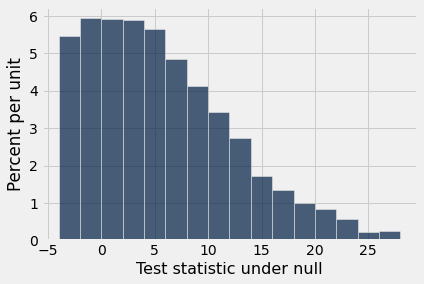

In [191]:
samples = make_array()    #5000 times simulating based on the assignment     
for i in np.arange(5000):
    samples =np.append(samples, simulate_under_null(num_death_penalty_states))
# Feel free to change the bins if they don't make sense for your test statistic.
Table().with_column('Test statistic under null', samples).hist(bins=np.arange(-4, 28+2, 2))

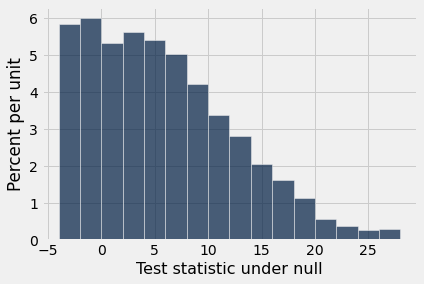

In [192]:
samples = make_array()        #10000 times simulating based on the our reference GitHub assignment   
for i in np.arange(10000):
    samples =np.append(samples, simulate_under_null(num_death_penalty_states))
# Feel free to change the bins if they don't make sense for your test statistic.
Table().with_column('Test statistic under null', samples).hist(bins=np.arange(-4, 28+2, 2))

In [ ]:
Table().with_column('Test statistic under null', samples)

Question 3.6. Complete the analysis as follows:

Compute a P-value.
Draw a conclusion about the null and alternative hypotheses.
Describe your findings using simple, non-technical language. Be careful not to claim that the statistical analysis has established more than it really has.

In [196]:
repetitions=5000
observed_statistic=22
p_value=np.count_nonzero(samples >= observed_statistic)/repetitions
p_value

0.031

In [197]:
repetitions=10000
observed_statistic=22
p_value=np.count_nonzero(samples >= observed_statistic)/repetitions
p_value

0.0155

#**4. Further evidence**

Question 4.1. Implement run_test, which takes the following arguments:

A table of murder rates for certain states, sorted by state and year like murder_rates, and
the year when the analysis starts. (The comparison group is two years later.)

In [198]:
def run_test(rates, start_year):
    """Return a P-value for the observed difference between increases and decreases."""
    end_year = start_year + 2
    all_state=rates.sort('State',distinct =True).column('State')
    two_years= rates.where('Year',are.between(start_year,end_year+1))
    i_and_d=make_array()
    
    for i in np.arange(len(all_state)):
      differ=diff_n(two_years.where('State', all_state[i]).column(3),2)
      i_and_d=np.append(i_and_d, differ)
    observed_test_statistic =np.count_nonzero(i_and_d > 0)-np.count_nonzero(i_and_d <0)
    print('Test statistic', start_year, 'to', end_year, ':', observed_test_statistic)
    
    n_states=rates.group('State').num_rows
    samples = make_array()
    for i in np.arange(5000):
        samples =np.append(samples, simulate_under_null(len(all_state)))
    p_value_above=(np.count_nonzero(samples >= observed_test_statistic))/5000
    p_value_below=(np.count_nonzero(samples < observed_test_statistic))/5000
    if observed_test_statistic < 0:
      p_value=p_value_below
      return p_value
    elif observed_test_statistic > 0:
      p_value=p_value_above 
      return p_value
   
run_test(death_penalty_murder_rate, 1971)

Test statistic 1971 to 1973 : 22


0.0172

Question 4.2. Create a table called non_death_penalty_murder_rates with the same columns as murder_rates but only containing rows for the six states without the death penalty in 1971. Perform the same test on this table. Then, in one sentence, conclude whether their murder rates were also more likely to increase from 1971 to 1973.

In [199]:
non_death_penalty_murder_rates = mur_rate_table.where('State', are.contained_in(non_death_penalty_states))
non_death_penalty_murder_rates

State,state_abbrev,Year,Population,Murder Rate
Alaska,AK,1960,"226,167",10.2
Alaska,AK,1961,"234,000",11.5
Alaska,AK,1962,"246,000",4.5
Alaska,AK,1963,"248,000",6.5
Alaska,AK,1964,"250,000",10.4
Alaska,AK,1965,"253,000",6.3
Alaska,AK,1966,"272,000",12.9
Alaska,AK,1967,"272,000",9.6
Alaska,AK,1968,"277,000",10.5
Alaska,AK,1969,"282,000",10.6


In [200]:
run_test(non_death_penalty_murder_rates, 1971)

Test statistic 1971 to 1973 : 6


0.2908

##**The death penalty reinstated**

In [201]:
print("Increases minus decreases from 1975 to 1977 (when the death penalty was reinstated) among death penalty states:",
      sum(death_penalty_murder_rate.where('Year', are.between_or_equal_to(1975, 1977))
                                    .group('State', two_year_changes)
                                    .column("Murder Rate two_year_changes")))
run_test(death_penalty_murder_rate, 1975)

Increases minus decreases from 1975 to 1977 (when the death penalty was reinstated) among death penalty states: -18
Test statistic 1975 to 1977 : -18


0.035

Question 5.1. Create a table called average_murder_rates with 1 row for each year in murder_rates. It should have 3 columns:

Year, the year,
Death penalty states, the average murder rate of the states that had the death penalty in 1971, and
No death penalty states, the average murder rate of the other states.

In [215]:
#states = mur_rate_table.group('State').select('State')
states = dp_mr.sort('State', distinct = True).column(0)
#states = death_penalty.where('Death Penalty', True).column(0)
average_murder_rates= Table().with_columns(
    'Year',mur_rate_table.sort('Year',distinct = True).column('Year'),
    'Death penalty states',mur_rate_table.drop('state_abbrev','Population').where('State', are.contained_in(states)).group('Year',np.mean).column(2),
    'No death penalty states',mur_rate_table.drop('state_abbrev','Population').where('State', are.contained_in(non_death_penalty_states)).group('Year',np.mean).column(2)
)
average_murder_rates

Year,Death penalty states,No death penalty states
1960,5.27955,3.55
1961,4.77727,3.68333
1962,4.61591,2.33333
1963,4.61364,2.75
1964,4.71136,3.4
1965,4.82727,3.18333
1966,5.43182,4.51667
1967,5.875,3.73333
1968,6.27045,4.73333
1969,6.50227,4.73333


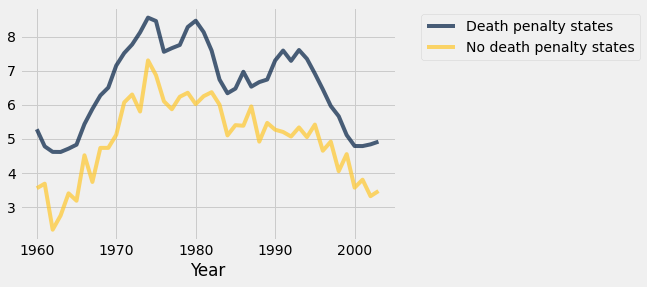

In [216]:
average_murder_rates.plot('Year')

In [217]:
df = pd.read_csv (r'/content/canada.txt')
df.head(5)

,Year,Homicide,Attempted murder,Violent crimes,Property crimes,Other crimes,Total
0,1963.0,1.32,0.57,249,"2,047",726,"3,022"
1,1964.0,1.31,0.63,284,"2,146",815,"3,245"
2,1965.0,1.41,0.57,299,"2,091",809,"3,199"
3,1966.0,1.25,0.65,347,"2,258",907,"3,511"
4,1967.0,1.66,0.68,381,"2,484",985,"3,850"


In [218]:
df.to_csv (r'/content/canada.csv', index=None)

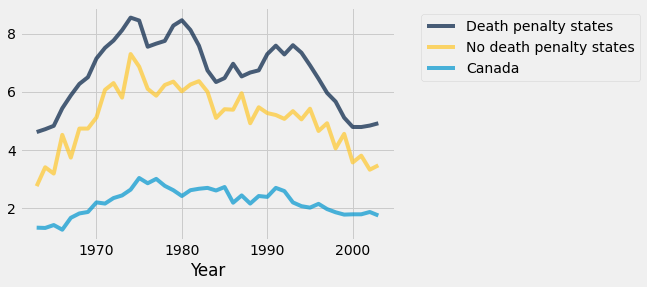

In [219]:
canada = Table.read_table('/content/canada.csv')
murder_rates_with_canada = average_murder_rates.join("Year", canada.select("Year", "Homicide").relabeled("Homicide", "Canada"))
murder_rates_with_canada.plot('Year')